In [1]:
import pandas as pd
df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")


In [2]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [3]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [4]:
df.shape

(250000, 13)

In [5]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [6]:
df.dtypes

,0
Customer ID,int64
Purchase Date,object
Product Category,object
Product Price,int64
Quantity,int64
Total Purchase Amount,int64
Payment Method,object
Customer Age,int64
Returns,float64
Customer Name,object


In [7]:
# Count missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [8]:
# Returns True/False for each column
cols_with_missing = df.columns[df.isnull().any()]

print(f"Columns with missing data: {cols_with_missing.tolist()}")


Columns with missing data: ['Returns']


In [9]:
# Replace 'purchase_date' with your actual column name
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
print(df['Purchase Date'].dtypes)

datetime64[ns]


In [10]:
# This keeps the first occurrence and drops subsequent identical columns
df = df.T.drop_duplicates().T


In [11]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Gender', 'Churn'],
      dtype='object')

In [12]:
df['Returns'].fillna(0, inplace=True)
missing_counts = df.isnull().sum()
print(missing_counts)



/tmp/ipython-input-3208914032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Returns'].fillna(0, inplace=True)
/tmp/ipython-input-3208914032.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Returns'].fillna(0, inplace=True)


Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Gender                   0
Churn                    0
dtype: int64


In [13]:
# 1. Check for non-positive Prices
invalid_prices = (df['Product Price'] <= 0).sum()

# 2. Check for non-positive Quantities
invalid_qty = (df['Quantity'] <= 0).sum()

# 3. Check for unrealistic Ages (e.g., outside 1-100)
invalid_age = (~df['Customer Age'].between(1, 100)).sum()

print(f"Invalid Prices: {invalid_prices}")
print(f"Invalid Quantities: {invalid_qty}")
print(f"Unrealistic Ages: {invalid_age}")


Invalid Prices: 0
Invalid Quantities: 0
Unrealistic Ages: 0


In [14]:
numeric_cols = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
# Use this if Churn is 'Yes'/'No'
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})

# Then ensure it is numeric
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')


/tmp/ipython-input-3316389388.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})


In [16]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')


In [17]:
print(df.dtypes)


Customer ID                      object
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                         float64
Customer Name                    object
Gender                           object
Churn                             int64
dtype: object


In [18]:
# Select the specific columns for the report
report_cols = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

# Generate and display summary statistics
summary_stats = df[report_cols].describe()
print(summary_stats)


       Product Price       Quantity  Total Purchase Amount   Customer Age
count  250000.000000  250000.000000          250000.000000  250000.000000
mean      254.659512       2.998896            2725.370732      43.940528
std       141.568577       1.414694            1442.933565      15.350246
min        10.000000       1.000000             100.000000      18.000000
25%       132.000000       2.000000            1477.000000      31.000000
50%       255.000000       3.000000            2724.000000      44.000000
75%       377.000000       4.000000            3974.000000      57.000000
max       500.000000       5.000000            5350.000000      70.000000


In [19]:
avg_purchase = df['Total Purchase Amount'].mean()
typical_qty = df['Quantity'].mode()[0]
min_age = df['Customer Age'].min()
max_age = df['Customer Age'].max()

print(f"Average Purchase Value: ${avg_purchase:.2f}")
print(f"Typical Quantity per Order: {typical_qty}")
print(f"Customer Age Range: {min_age} to {max_age} years")


Average Purchase Value: $2725.37
Typical Quantity per Order: 1
Customer Age Range: 18 to 70 years


In [20]:
category_revenue = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False)
print(f"Highest total Purchase by category {category_revenue}")
payment_counts = df['Payment Method'].value_counts()
print(f"Most common payment method {payment_counts}")
churn_rate = df['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")
avg_spend_churn = df.groupby('Churn')['Total Purchase Amount'].mean()
print(f"Average Spend by Churn Status (0=Stayed, 1=Churned): (avg_spend_churn)")


Highest total Purchase by category Product Category
Books          204939601
Clothing       204532405
Electronics    136599467
Home           135271210
Name: Total Purchase Amount, dtype: int64
Most common payment method Payment Method
Credit Card    100486
PayPal          74837
Cash            49894
Crypto          24783
Name: count, dtype: int64
Churn Rate: 19.95%
Average Spend by Churn Status (0=Stayed, 1=Churned): (avg_spend_churn)


/tmp/ipython-input-867371642.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='Product Category', y='Total Purchase Amount', palette='viridis')


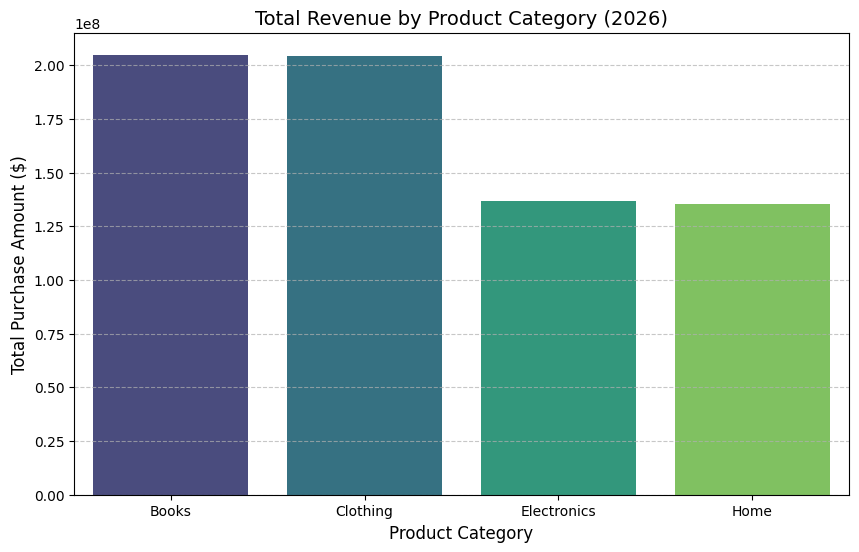

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by category and sum revenue, then sort descending
category_revenue = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False).reset_index()

# 2. Create the Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='Product Category', y='Total Purchase Amount', palette='viridis')

# 3. Add labels and title
plt.title('Total Revenue by Product Category (2026)', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Purchase Amount ($)', fontsize=12)

# Optional: Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


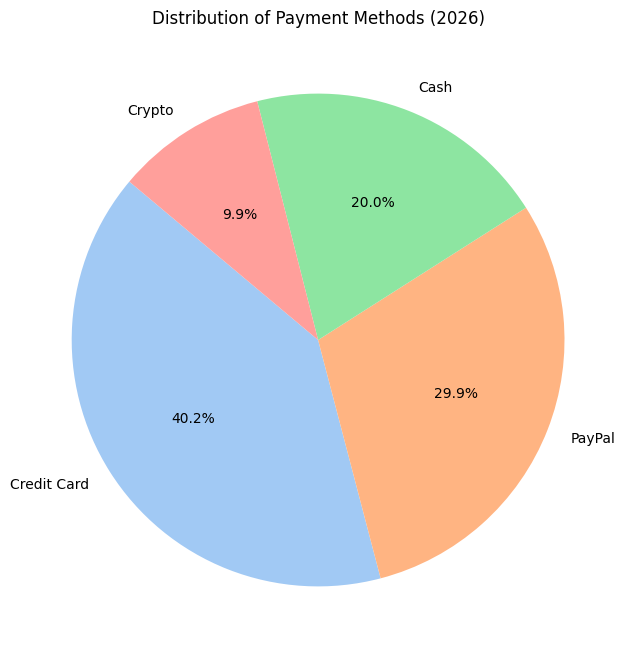

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data
payment_counts = df['Payment Method'].value_counts()

# 2. Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'))

plt.title('Distribution of Payment Methods (2026)')
plt.show()


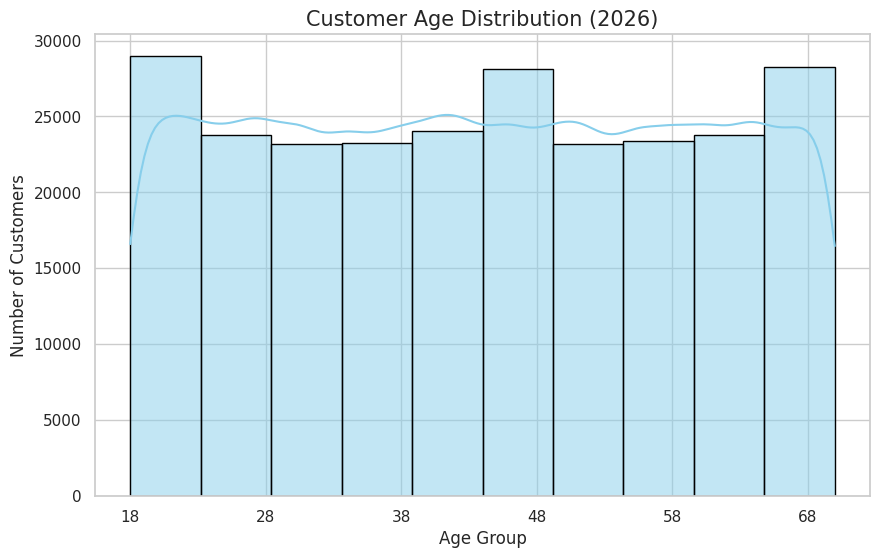

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Create histogram with 10-year bins (e.g., 20-30, 30-40)
# kde=True adds a smooth trend line
sns.histplot(df['Customer Age'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Customer Age Distribution (2026)', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Optional: Set x-axis ticks to match typical age milestones
plt.xticks(range(int(df['Customer Age'].min()), int(df['Customer Age'].max()) + 5, 10))

plt.show()


In [24]:
# Group by Customer ID and calculate specific metrics for 2026
customer_df = df.groupby('Customer ID').agg(
    Last_Purchase_Date=('Purchase Date', 'max'),
    Frequency=('Customer ID', 'count'),
    Monetary_Value=('Total Purchase Amount', 'sum')
).reset_index()

# Display the first few rows of the new dataframe
print(customer_df.head())


   Customer ID  Last_Purchase_Date  Frequency  Monetary_Value
0            1 2023-07-19 19:09:20          1            3491
1            2 2022-11-21 06:48:05          3            7988
2            3 2023-06-18 12:31:42          8           22587
3            4 2023-05-12 10:50:24          4            8715
4            5 2023-03-28 13:30:55          8           12524


In [25]:
print(f"Original transaction rows: {len(df)}")
print(f"New customer-level rows: {len(customer_df)}")


Original transaction rows: 250000
New customer-level rows: 49673


In [26]:
customer_df.head()

,Customer ID,Last_Purchase_Date,Frequency,Monetary_Value
0,1,2023-07-19 19:09:20,1,3491
1,2,2022-11-21 06:48:05,3,7988
2,3,2023-06-18 12:31:42,8,22587
3,4,2023-05-12 10:50:24,4,8715
4,5,2023-03-28 13:30:55,8,12524


In [27]:
# 1. Set reference date as the maximum date in the dataset ("today")
reference_date = df['Purchase Date'].max()

# 2. Calculate Recency in days
# We subtract the last purchase date from the reference date and extract the '.days'
customer_df['Recency'] = (reference_date - customer_df['Last_Purchase_Date']).dt.days

# Display the updated dataframe
print(f"Reference Date (Today): {reference_date}")
customer_df.head()


Reference Date (Today): 2023-09-15 12:24:08


,Customer ID,Last_Purchase_Date,Frequency,Monetary_Value,Recency
0,1,2023-07-19 19:09:20,1,3491,57
1,2,2022-11-21 06:48:05,3,7988,298
2,3,2023-06-18 12:31:42,8,22587,88
3,4,2023-05-12 10:50:24,4,8715,126
4,5,2023-03-28 13:30:55,8,12524,170


In [28]:
# Check Min, Max, and Average Recency
recency_stats = customer_df['Recency'].describe()
print(recency_stats)

# Verification Logic:
# Min Recency: Should be 0 (the customer(s) who bought on the reference_date).
# Max Recency: Shows the customer who hasn't shopped in the longest time.


count    49673.000000
mean       260.424979
std        246.024001
min          0.000000
25%         77.000000
50%        184.000000
75%        368.000000
max       1352.000000
Name: Recency, dtype: float64


In [29]:
# Recency: Lower is better (1=oldest, 4=most recent)
customer_df['R_Score'] = pd.qcut(customer_df['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency: Higher is better (1=lowest, 4=highest)
# Note: If you have many customers with the same frequency, use duplicates='drop'
customer_df['F_Score'] = pd.qcut(customer_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Monetary: Higher is better (1=lowest, 4=highest)
customer_df['M_Score'] = pd.qcut(customer_df['Monetary_Value'], 4, labels=[1, 2, 3, 4])


In [30]:
# RFM_Class as a string (e.g., "444")
customer_df['RFM_Class'] = customer_df['R_Score'].astype(str) + \
                           customer_df['F_Score'].astype(str) + \
                           customer_df['M_Score'].astype(str)

# RFM_Total_Score as a number (e.g., 12)
customer_df['RFM_Total_Score'] = customer_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

customer_df.head()


,Customer ID,Last_Purchase_Date,Frequency,Monetary_Value,Recency,R_Score,F_Score,M_Score,RFM_Class,RFM_Total_Score
0,1,2023-07-19 19:09:20,1,3491,57,4,1,1,411,6
1,2,2022-11-21 06:48:05,3,7988,298,2,1,1,211,4
2,3,2023-06-18 12:31:42,8,22587,88,3,4,4,344,11
3,4,2023-05-12 10:50:24,4,8715,126,3,2,1,321,6
4,5,2023-03-28 13:30:55,8,12524,170,3,4,2,342,9


In [31]:
# Check Min and Max
print("Score Range Validation:")
print(customer_df[['R_Score', 'F_Score', 'M_Score']].agg(['min', 'max']))

# View a sample of high-value customers
print("\nTop Customers (Best Score = 12):")
print(customer_df[customer_df['RFM_Total_Score'] == 12].head())


Score Range Validation:
     R_Score  F_Score  M_Score
min        4        1        1
max        1        4        4

Top Customers (Best Score = 12):
    Customer ID  Last_Purchase_Date  Frequency  Monetary_Value  Recency  \
16           17 2023-09-01 22:20:48          9           24042       13   
21           22 2023-08-25 12:59:19          9           32052       20   
29           30 2023-07-08 22:19:44         11           31412       68   
66           67 2023-09-14 20:31:38         10           26885        0   
70           71 2023-07-15 06:41:08          7           29547       62   

   R_Score F_Score M_Score RFM_Class  RFM_Total_Score  
16       4       4       4       444               12  
21       4       4       4       444               12  
29       4       4       4       444               12  
66       4       4       4       444               12  
70       4       4       4       444               12  


In [32]:
# Define the score boundaries and corresponding labels
bins = [0, 3, 5, 7, 9, 12]
labels = ['Low Value', 'At Risk', 'Potential Loyalists', 'Loyal Customers', 'Champions']

customer_df['Customer_Segment'] = pd.cut(customer_df['RFM_Total_Score'], bins=bins, labels=labels)


In [33]:
# Get the average churn status per Customer ID from the original data
churn_data = df.groupby('Customer ID')['Churn'].max().reset_index()

# Merge this into our customer-level dataframe
customer_df = customer_df.merge(churn_data, on='Customer ID')


In [34]:
segment_analysis = customer_df.groupby('Customer_Segment').agg(
    Customer_Count=('Customer ID', 'count'),
    Avg_Monetary_Value=('Monetary_Value', 'mean'),
    Avg_Recency=('Recency', 'mean'),
    Churn_Rate=('Churn', 'mean')
).sort_values(by='Avg_Monetary_Value', ascending=False)

# Convert Churn_Rate to percentage for the report
segment_analysis['Churn_Rate'] = (segment_analysis['Churn_Rate'] * 100).round(2).astype(str) + '%'

print(segment_analysis)


                     Customer_Count  Avg_Monetary_Value  Avg_Recency  \
Customer_Segment                                                       
Champions                     13796        21385.429037    99.533271   
Loyal Customers               11469        15042.126253   184.935740   
Potential Loyalists           11195        11049.252255   254.252702   
At Risk                        8462         7870.470102   377.379816   
Low Value                      4751         4945.245422   716.092191   

                    Churn_Rate  
Customer_Segment                
Champions               19.65%  
Loyal Customers         20.27%  
Potential Loyalists     19.95%  
At Risk                 20.24%  
Low Value               20.21%  


/tmp/ipython-input-1556810878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = customer_df.groupby('Customer_Segment').agg(


/tmp/ipython-input-1344218005.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_plot_data = customer_df.groupby('Customer_Segment').agg(
/tmp/ipython-input-1344218005.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=segment_plot_data, x='Customer_Segment', y='Customer_Count', palette='viridis')
/tmp/ipython-input-1344218005.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=segment_plot_data, x='Customer_Segment', y='Avg_Monetary_Value', palette='flare

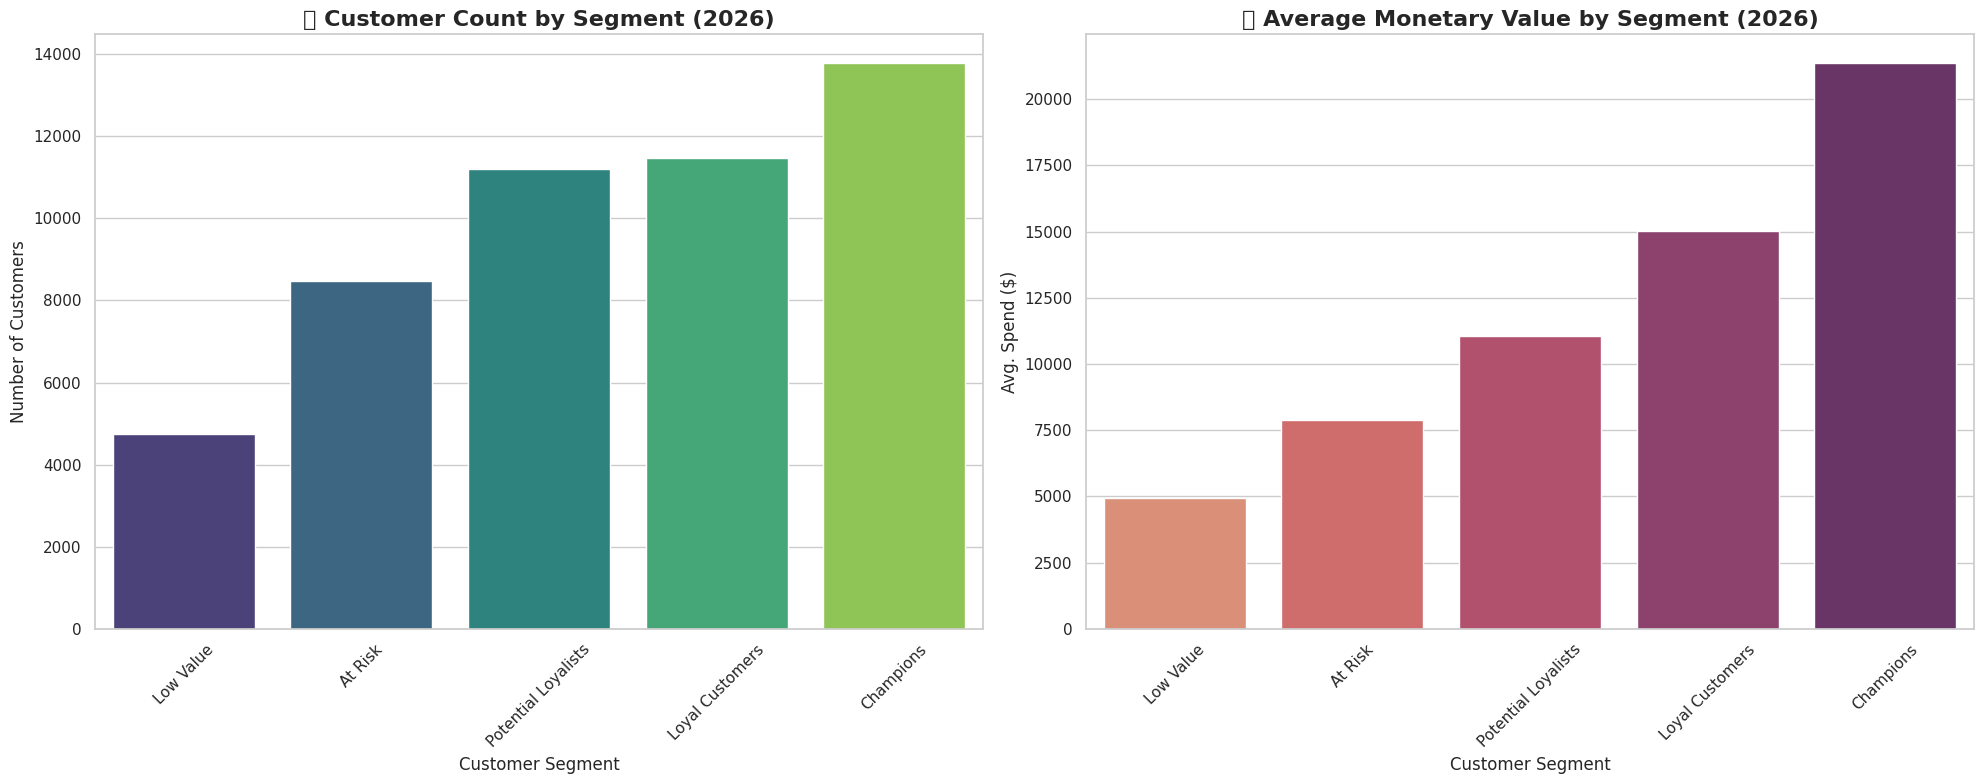

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data for plotting
# We ensure segments are in the logical order from lowest to highest value
segment_plot_data = customer_df.groupby('Customer_Segment').agg(
    Customer_Count=('Customer ID', 'count'),
    Avg_Monetary_Value=('Monetary_Value', 'mean')
).reindex(['Low Value', 'At Risk', 'Potential Loyalists', 'Loyal Customers', 'Champions']).reset_index()

# 2. Set up the visual style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- Option A: Bar Chart of Customer Count by Segment ---
sns.barplot(ax=axes[0], data=segment_plot_data, x='Customer_Segment', y='Customer_Count', palette='viridis')
axes[0].set_title('📊 Customer Count by Segment (2026)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Customer Segment', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# --- Option B: Bar Chart of Average Monetary Value by Segment ---
sns.barplot(ax=axes[1], data=segment_plot_data, x='Customer_Segment', y='Avg_Monetary_Value', palette='flare')
axes[1].set_title('💰 Average Monetary Value by Segment (2026)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Customer Segment', fontsize=12)
axes[1].set_ylabel('Avg. Spend ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 3. Final layout adjustment
plt.tight_layout()
plt.show()
